**pandas demo**

Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

---

In [3]:
# будем использовать модуль datasets библиотеки sklearn
# для получения модельных данных
from sklearn import __version__ as sklearn_version
print(sklearn_version)

# загружаем данные о цветах
from sklearn.datasets import load_iris
data = load_iris()

0.23.1


In [4]:
# структура содержит таблицу с цифрами, текстовое описание описание данных и др.

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
set(data['target'])

{0, 1, 2}

In [10]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
data['filename']

'/usr/lib/python3.8/site-packages/sklearn/datasets/data/iris.csv'

---

In [12]:
# строим из данных Pandas DataFrame
df = pd.DataFrame(data['data'],columns=data['feature_names'])
print(len(df))
df

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
# добавляем слолбец target (номер класса)
df['target'] = data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
# строим словарь  номер класса - название 
name_map = { i:s for i,s in enumerate(data['target_names']) } 
name_map

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [15]:
df['target_names'] = df['target'].map(name_map)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [16]:
# список столбцов
df.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_names']

In [17]:
# первые строки таблицы
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [18]:
# последние строки таблицы
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [19]:
# случайная выборка из таблицы
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
131,7.9,3.8,6.4,2.0,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
139,6.9,3.1,5.4,2.1,2,virginica


In [20]:
# статистики по столбцам
df.describe(percentiles=[.1,.99])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
10%,4.800000,2.500000,1.400000,0.200000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
99%,7.700000,4.151000,6.700000,2.500000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


---

In [21]:
# выборка из таблицы
df[ df['sepal width (cm)']<2.3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
60,5.0,2.0,3.5,1.0,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
68,6.2,2.2,4.5,1.5,1,versicolor
119,6.0,2.2,5.0,1.5,2,virginica


---

In [22]:
# минимальные значения по классам
df.groupby('target_names').min()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,4.3,2.3,1.0,0.1,0
versicolor,4.9,2.0,3.0,1.0,1
virginica,4.9,2.2,4.5,1.4,2


In [23]:
# количество по классам
df.groupby('target_names').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


<AxesSubplot:>

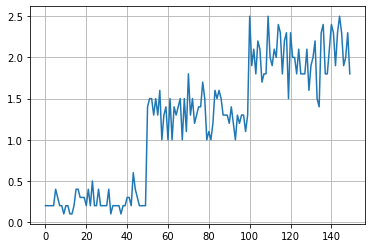

In [24]:
# простой график значений по слобцу 
df['petal width (cm)'].plot(grid=True)

<AxesSubplot:ylabel='Frequency'>

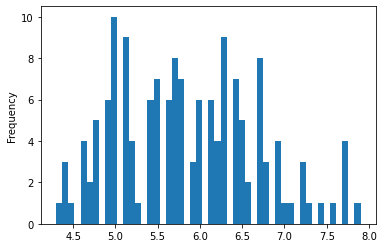

In [25]:
# гистограмма по столбцу
df['sepal length (cm)'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

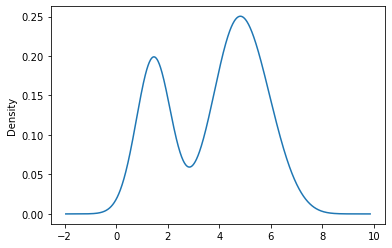

In [26]:
# оценка плотности распределения по столбцу
df['petal length (cm)'].plot.kde()

In [27]:
# df.merge()

In [28]:
# df['target_names'].map(lambda s: s.split('-'))

----

In [29]:
# количество пропусков в таблице
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

In [30]:
# портим данные, 
# выкидываем значения из случайно выбранных ячеек

c = np.random.randint(0,df.columns.size,df.columns.size,)
r = np.random.randint(0,df.count()[0],df.count()[0])

df.iloc[r,c] = None

c,r

(array([3, 0, 3, 2, 0, 4]),
 array([ 13, 104,  40,  21,  73, 124,  22,  69,  27,  52,  35,  50,  57,
         35, 114,  33,  49,  57,  20,  85, 121,  20,  71,  29,  47, 110,
         53,  24, 113,  66, 148, 149,   4,  53,  86, 140,  34, 144, 115,
        119, 132,  64,  93,  82,  70,  76, 143, 140,  85, 135,  98,  24,
         22,  14,  63,  30, 116,   6,  23, 125, 107,  79,  10,  86,  87,
        137,  33,  80,  11,  30,  99,  13,  58, 135,  67,  29, 107,  59,
         80,  64,  75, 141,  23,  58,  79, 134, 117,  71, 146,  28,  57,
         74,  46,  19,  45,  70, 115,  11, 139,   7,   5, 140,  13,  80,
         38,  71,  67, 137,  11, 146,  44,  68,  44,  78, 145,  16,  43,
         18,  91,  52,  52, 114,   3,  35, 122, 148, 145,  55,  73, 121,
         10, 148,  73,  38, 124,  72,  76,  20,  84, 112,  20, 147,  10,
        134,  84, 135,  49, 107, 115,  27]))

In [31]:
# заполняем пропуски нулями
df.fillna(0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,0.0,3.1,0.0,0.0,0.0,setosa
4,0.0,3.6,0.0,0.0,0.0,setosa
...,...,...,...,...,...,...
145,0.0,3.0,0.0,0.0,0.0,virginica
146,0.0,2.5,0.0,0.0,0.0,virginica
147,0.0,3.0,0.0,0.0,0.0,virginica
148,0.0,3.4,0.0,0.0,0.0,virginica


In [32]:
# записи не содержащие пропусков
df[~df.isnull().any(axis=1)].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


In [33]:
# количество пропусков в таблице
df.isnull().sum()

sepal length (cm)    92
sepal width (cm)      0
petal length (cm)    92
petal width (cm)     92
target               92
target_names          0
dtype: int64

In [34]:
df.dropna() # удаление записей с пропусками

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa
12,4.8,3.0,1.4,0.1,0.0,setosa
15,5.7,4.4,1.5,0.4,0.0,setosa
17,5.1,3.5,1.4,0.3,0.0,setosa
25,5.0,3.0,1.6,0.2,0.0,setosa
26,5.0,3.4,1.6,0.4,0.0,setosa


In [35]:
df.fillna(.0) # заполнение пропусков

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,0.0,3.1,0.0,0.0,0.0,setosa
4,0.0,3.6,0.0,0.0,0.0,setosa
...,...,...,...,...,...,...
145,0.0,3.0,0.0,0.0,0.0,virginica
146,0.0,2.5,0.0,0.0,0.0,virginica
147,0.0,3.0,0.0,0.0,0.0,virginica
148,0.0,3.4,0.0,0.0,0.0,virginica


In [36]:
df.ffill() # заполнение пропусков из предыдущей строки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.7,3.1,1.3,0.2,0.0,setosa
4,4.7,3.6,1.3,0.2,0.0,setosa
...,...,...,...,...,...,...
145,5.8,3.0,5.1,1.9,2.0,virginica
146,5.8,2.5,5.1,1.9,2.0,virginica
147,5.8,3.0,5.1,1.9,2.0,virginica
148,5.8,3.4,5.1,1.9,2.0,virginica


In [37]:
df.bfill()# заполнение пропусков из cледующей строки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.4,3.1,1.4,0.2,0.0,setosa
4,4.4,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,NaN,3.0,NaN,NaN,NaN,virginica
146,NaN,2.5,NaN,NaN,NaN,virginica
147,NaN,3.0,NaN,NaN,NaN,virginica
148,NaN,3.4,NaN,NaN,NaN,virginica


In [38]:
df.ffill(axis=1) # заполнение пропусков из предыдущего стролбца

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,NaN,3.1,3.1,3.1,3.1,setosa
4,NaN,3.6,3.6,3.6,3.6,setosa
...,...,...,...,...,...,...
145,NaN,3,3,3,3,virginica
146,NaN,2.5,2.5,2.5,2.5,virginica
147,NaN,3,3,3,3,virginica
148,NaN,3.4,3.4,3.4,3.4,virginica


In [39]:
df.bfill(axis=1) # заполнение пропусков из cледующей стролбца

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,3.1,3.1,setosa,setosa,setosa,setosa
4,3.6,3.6,setosa,setosa,setosa,setosa
...,...,...,...,...,...,...
145,3,3,virginica,virginica,virginica,virginica
146,2.5,2.5,virginica,virginica,virginica,virginica
147,3,3,virginica,virginica,virginica,virginica
148,3.4,3.4,virginica,virginica,virginica,virginica


----

In [40]:
# статистика по странам Евросоюза
# https://ec.europa.eu/eurostat

import eurostat

In [41]:
# список тем в источнике
toc = eurostat.get_toc_df().drop_duplicates()

In [42]:
toc.sample(20)

,title,code,type,last update of data,last table structure change,data start,data end
672,Individuals - computer use,isoc_ci_cfp_cu,dataset,15.04.2020,15.04.2020,2002,2017
3937,"Persons aged 18 and over by risk of poverty, m...",ilc_pees07,dataset,02.09.2020,27.02.2020,2008,2019
1593,"Self-perceived health by sex, age and educatio...",hlth_silc_02,dataset,26.08.2020,03.03.2020,2008,2019
224,Early leavers from education and training by s...,edat_lfse_16,dataset,07.08.2020,24.04.2020,2000,2019
1334,"Immigration by sex, country of birth and broad...",migr_imm7ctb,dataset,05.03.2020,05.03.2020,2008,2018
6702,Business expenditure on R&D (BERD) by size cla...,rd_e_berdsize,dataset,18.03.2020,27.02.2020,1980,2018
59,"GDP and main components (output, expenditure ...",namq_10_gdp,dataset,02.09.2020,19.08.2020,1975Q1,2020Q2
5157,Expenditure on same-day visits - annual data,tour_dem_sdvexa,dataset,17.01.2020,27.02.2020,2014,2018
2941,"Employment by educational attainment level, ag...",lfsa_eseged,dataset,01.09.2020,21.04.2020,2011,2019
1029,Input coefficients,naio_10_coin,dataset,17.04.2020,17.04.2020,2005,2019


In [43]:
toc[['type','code']].groupby('type').count() # типы данных в источнике

,code
type,
comext,16
dataset,5279
folder,1683
table,1099


In [44]:
# toc[ toc['type']=='table' ]

In [45]:
# Animal populations by NUTS 2 regions
df = eurostat.get_data_df('tgs00045')
df

,animals,unit,geo\time,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,A2000,THS_HD,AT11,21.49,22.04,21.65,22.03,21.61,20.98,20.93,20.43,20.43,19.88,19.20,18.69
1,A2000,THS_HD,AT12,449.70,456.97,453.81,449.62,443.94,446.08,446.87,442.58,438.55,436.44,429.03,419.66
2,A2000,THS_HD,AT13,0.12,0.11,0.12,0.13,0.11,0.09,0.10,0.07,0.10,0.08,0.08,0.08
3,A2000,THS_HD,AT21,193.76,199.03,198.08,191.63,189.97,189.02,188.12,186.25,186.72,188.33,185.63,183.72
4,A2000,THS_HD,AT22,337.42,343.40,338.48,328.58,323.05,322.47,323.15,322.89,322.29,319.58,319.72,315.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,A4200,THS_HD,SK01,0.50,0.50,0.58,0.58,0.55,0.79,0.71,0.67,0.58,0.59,0.67,0.62
1220,A4200,THS_HD,SK02,10.00,9.60,9.52,9.20,9.37,9.41,9.53,9.44,9.50,9.61,9.15,8.91
1221,A4200,THS_HD,SK03,15.80,14.70,14.50,14.32,14.52,15.09,15.39,16.26,16.15,16.68,16.32,15.47
1222,A4200,THS_HD,SK04,10.80,10.80,10.69,9.95,10.38,10.17,9.55,9.96,10.12,10.18,10.77,10.60


<AxesSubplot:title={'center':'A4200 / THS_HD / HR03'}>

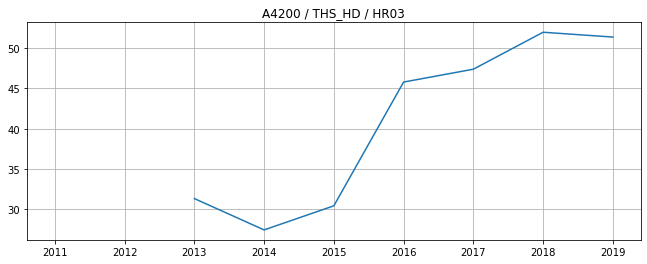

In [46]:
i=np.random.randint(len(df))
df.iloc[i,3:].plot( 
    grid=True,
    figsize=(11,4),
    title=' / '.join( df.iloc[i,:3].to_list() ) 
)

----

In [47]:
import wikipedia as wkp

wkp.set_lang('ru')

In [48]:
l = wkp.search('новичок')

In [49]:
print(l)

['Новичок', 'Новичок (отравляющие вещества)', 'Новобранец (телесериал, 2018)', 'Новичок (фильм, 1990)', 'Новичок года НБА', 'Отравление Сергея и Юлии Скрипаль', 'Неофит', 'Новичок (мультфильм)', 'Мир Дикого запада (3-й сезон)', 'Ан-12']


In [50]:
print( wkp.summary(l[1], sentences=1) )

«Новичо́к» — семейство фторфосфорорганических отравляющих веществ нервно-паралитического действия, ингибиторов ацетилхолинэстеразы.


In [51]:
p = wkp.page(l[1])

In [52]:
print(p.title)

Новичок (отравляющие вещества)


In [53]:
print(p.url)

https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%B8%D1%87%D0%BE%D0%BA_(%D0%BE%D1%82%D1%80%D0%B0%D0%B2%D0%BB%D1%8F%D1%8E%D1%89%D0%B8%D0%B5_%D0%B2%D0%B5%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B0)


In [54]:
print(p.links[:3],'....\n')

['1,2-Дихлорэтан', '1-метокси-1,3,5-циклогептатриен', 'Bellingcat'] ....



In [55]:
print(p.content+'\n')

«Новичо́к» — семейство фторфосфорорганических отравляющих веществ нервно-паралитического действия, ингибиторов ацетилхолинэстеразы. По заявлению члена российской делегации на 57-й и 59-й Сессиях исполкома Организации по запрещению химического оружия Виктора Холстова, семейство состоит более чем из шестидесяти похожих соединений. Наиболее известные из них:

А-230: N-(метилфторфосфонил)-N',N'-диэтил-ацетамидин (рисунок 1 слева), замерзает в холодную погоду;
А-232: N-(O-Метилфторфосфонил)-N',N'-диэтил-ацетамидин (рисунок 1 справа), разрабатывался и испытывался для использования в качестве боевого отравляющего вещества;
А-234: N-(O-Этилфторфосфонил)-N',N'-диэтил-ацетамидин, похож на вязкую мазь и не распространяется по воздуху, поражает организм при попадании на кожу, стабилен и устойчив к погодным условиям.14 января 2019 года 62-я сессия исполкома Организации по запрещению химического оружия предложила внести группы веществ, включающие A-230, A-232, A-234, в Список 1 отравляющих веществ, 

----

In [56]:
# упражнения

# https://github.com/ajcr/100-pandas-puzzles